In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Model Analysis and Simulation/Assignment1/MNIST_digits0-1-2.csv")
df1=pd.read_csv("/content/drive/MyDrive/Model Analysis and Simulation/Assignment1/MNIST_digits0-1-2.csv")

In [3]:
df=np.array(df)

In [4]:
df.shape

(299, 785)

In [5]:
df1.head()

,0.00000,0.00000.1,0.00000.2,0.00000.3,0.00000.4,0.00000.5,0.00000.6,0.00000.7,0.00000.8,0.00000.9,...,0.00000.599,0.00000.600,0.00000.601,0.00000.602,0.00000.603,0.00000.604,0.00000.605,0.00000.606,0.00000.607,0.00000.608
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.shape

(299, 785)

In [7]:
df1.iloc[:,-1].unique()

array([0., 1., 2.])

In [8]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device
df_tensor = torch.from_numpy(df)
df_tensor.to(device)
x,y=df_tensor[:,:-1],df_tensor[:,-1]
x_mean=torch.mean(x,dim=0)
x=x-x_mean
cov_matrix=torch.cov(x.T)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix)
torch.sum(eigenvalues)
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors=eigenvectors[0:3]
projected=torch.matmul(x,eigenvectors.T)



In [9]:
x,y

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [10]:
x.shape

torch.Size([299, 784])

In [11]:
cov_matrix

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [12]:
cov_matrix.shape

torch.Size([784, 784])

In [13]:
eigenvalues

tensor([  1.1468e+01,   5.6070e+00,   4.2747e+00,   3.2842e+00,   2.6140e+00,
          1.7192e+00,   1.6176e+00,   1.3903e+00,   1.1683e+00,   1.0824e+00,
          1.0025e+00,   9.5424e-01,   8.2973e-01,   7.4892e-01,   7.0100e-01,
          6.4411e-01,   5.9256e-01,   5.9177e-01,   5.3297e-01,   5.2036e-01,
          4.7117e-01,   4.2563e-01,   3.9928e-01,   3.8424e-01,   3.6680e-01,
          3.4865e-01,   3.4744e-01,   3.0810e-01,   2.7893e-01,   2.7682e-01,
          2.6404e-01,   2.6223e-01,   2.4455e-01,   2.4140e-01,   2.3619e-01,
          2.2453e-01,   2.1091e-01,   2.0197e-01,   1.9474e-01,   1.9237e-01,
          1.7879e-01,   1.7017e-01,   1.6665e-01,   1.6197e-01,   1.5464e-01,
          1.4731e-01,   1.4259e-01,   1.3732e-01,   1.3395e-01,   1.2647e-01,
          1.2278e-01,   1.1536e-01,   1.1374e-01,   1.1185e-01,   1.0777e-01,
          1.0404e-01,   1.0018e-01,   9.5943e-02,   9.4481e-02,   8.9762e-02,
          8.6364e-02,   8.3334e-02,   8.0443e-02,   8.0276e-02, 

In [14]:
eigenvalues.shape

torch.Size([784])

In [15]:
eigenvectors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], dtype=torch.float64)

In [16]:
eigenvectors.shape

torch.Size([3, 784])

In [17]:
x.shape

torch.Size([299, 784])

In [18]:
eigenvectors.shape

torch.Size([3, 784])

In [19]:
projected.shape

torch.Size([299, 3])

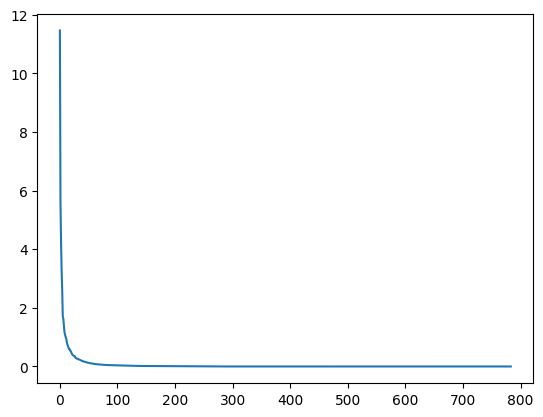

In [20]:
plt.plot(eigenvalues)

In [21]:
# Assume eigenvalues are already sorted in descending order
# Calculate the total variance
total_variance = torch.sum(eigenvalues)

# Calculate the cumulative variance
cumulative_variance = torch.cumsum(eigenvalues, dim=0)

# Calculate the ratio of the cumulative variance to the total variance
variance_ratio = cumulative_variance / total_variance

# Find the number of components needed to capture 99% of the variance
n_components_99 = torch.searchsorted(variance_ratio, 0.99) + 1  # Adding 1 because indices start at 0

n_components_99


tensor(160)

In [22]:
cumulative_variance

tensor([11.4676, 17.0746, 21.3493, 24.6335, 27.2476, 28.9668, 30.5843, 31.9747,
        33.1429, 34.2253, 35.2278, 36.1820, 37.0117, 37.7607, 38.4617, 39.1058,
        39.6983, 40.2901, 40.8231, 41.3434, 41.8146, 42.2402, 42.6395, 43.0238,
        43.3906, 43.7392, 44.0867, 44.3948, 44.6737, 44.9505, 45.2145, 45.4768,
        45.7213, 45.9627, 46.1989, 46.4234, 46.6343, 46.8363, 47.0311, 47.2234,
        47.4022, 47.5724, 47.7390, 47.9010, 48.0556, 48.2029, 48.3455, 48.4829,
        48.6168, 48.7433, 48.8661, 48.9814, 49.0952, 49.2070, 49.3148, 49.4188,
        49.5190, 49.6150, 49.7094, 49.7992, 49.8856, 49.9689, 50.0493, 50.1296,
        50.2088, 50.2836, 50.3582, 50.4290, 50.4990, 50.5682, 50.6353, 50.7016,
        50.7659, 50.8277, 50.8890, 50.9465, 51.0036, 51.0590, 51.1129, 51.1652,
        51.2171, 51.2681, 51.3187, 51.3680, 51.4156, 51.4626, 51.5088, 51.5540,
        51.5985, 51.6426, 51.6860, 51.7285, 51.7698, 51.8100, 51.8490, 51.8872,
        51.9245, 51.9614, 51.9980, 52.03

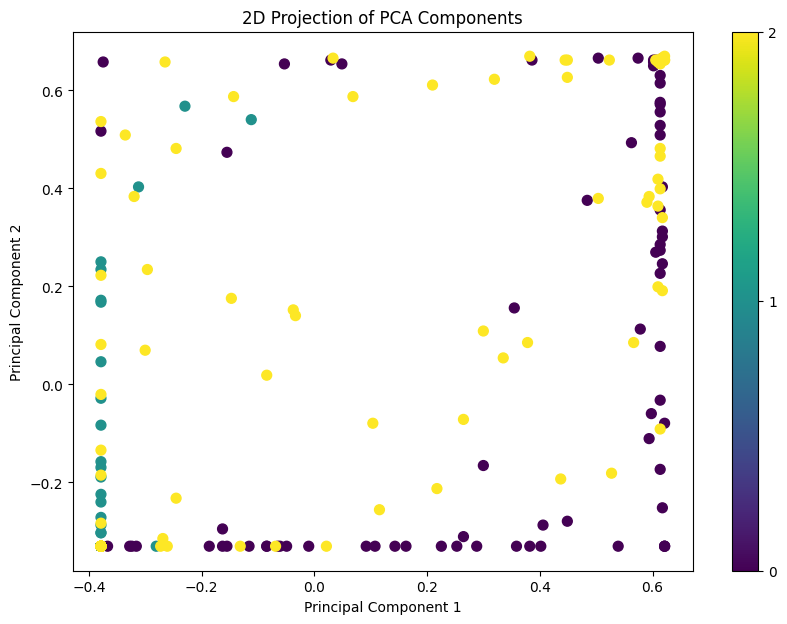

In [23]:
import matplotlib.pyplot as plt

# Assuming `projected` is your data projected into 2D space
# And assuming you have a labels array `y` that corresponds to each point
plt.figure(figsize=(10, 7))
plt.scatter(projected[:, 0], projected[:, 1], c=y, cmap='viridis', s=50, alpha=1)  # Color-coded by label
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of PCA Components')
plt.colorbar(ticks=[0, 1, 2])
plt.show()


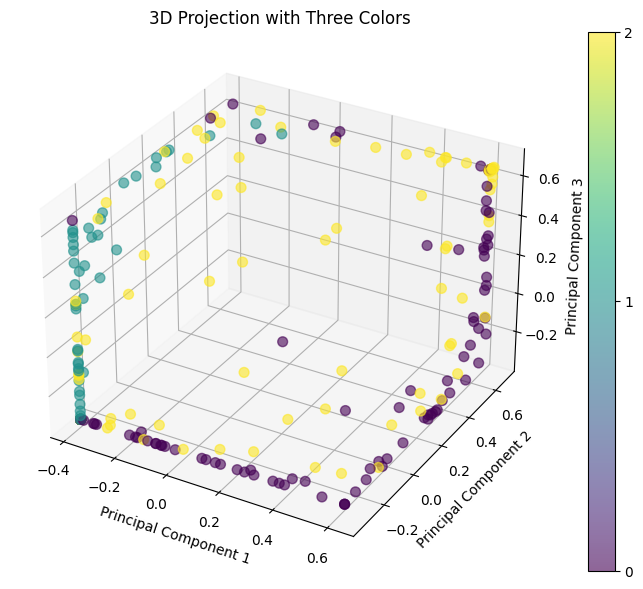

In [24]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

# Assuming `projected_3d` is your data projected into 3D space with shape [299, 3]
# `y` is the column for color-coding, ensure it has values 0, 1, or 2 after any adjustment
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Perform the scatter plot and capture the output for colorbar
scatter = ax.scatter(projected[:, 0], projected[:, 1], projected[:, 2],
                     c=y, cmap='viridis', s=50, alpha=0.6)  # Assuming y is now [0, 1, 2] for colors

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Projection with Three Colors')

# Correct way to use colorbar with ticks for the unique values of y
plt.colorbar(scatter, ticks=[0, 1, 2])  # Assumes y contains values [0, 1, 2]

plt.show()


In [25]:
eigenvectors.shape

torch.Size([3, 784])

In [26]:
projected.shape

torch.Size([299, 3])

In [27]:
X_reconstructed = torch.mm(projected, eigenvectors) + x_mean
import torch.nn.functional as F
# Calculate reconstruction loss (MSE)
reconstruction_loss = F.mse_loss(X_reconstructed, x)

print(f"Reconstruction loss: {reconstruction_loss.item()}")

Reconstruction loss: 0.11554273168014047


In [28]:
X_reconstructed.shape

torch.Size([299, 784])

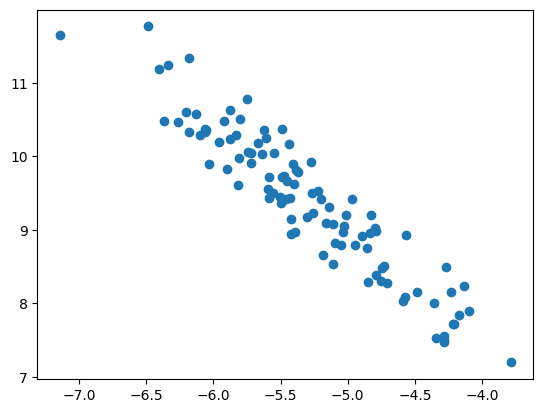

In [29]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Transformation matrix
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

# Generate isotropic Gaussian blobs
D, y = make_blobs(n_samples=100, centers=1, random_state=42)

# Apply the transformation to get anisotropic Gaussian blobs
X = np.dot(D, transformation)

# Plotting the anisotropic blobs
plt.scatter(X[:, 0], X[:, 1])
plt.show()


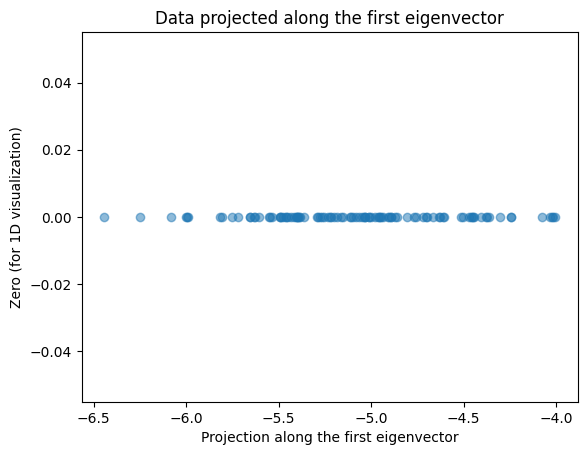

In [30]:
X.shape
X_tensor=torch.from_numpy(X)
X_tensor=X_tensor.to(device)
X_mean=torch.mean(X_tensor,dim=0)
X_tensor-X_mean
cov_matrix_X=torch.cov(X_tensor.T)
eigenvalues,eigenvectors=torch.linalg.eigh(cov_matrix_X)
eigenvectors.shape
sorted_indices = torch.argsort(eigenvalues, descending=True)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
eigenvectors=eigenvectors[0:1]
projected=torch.matmul(X_tensor,eigenvectors.T)
projected=projected.to('cpu')
plt.scatter(projected, np.zeros_like(projected), alpha=0.5)
plt.xlabel('Projection along the first eigenvector')
plt.ylabel('Zero (for 1D visualization)')
plt.title('Data projected along the first eigenvector')
plt.show()

In [31]:
projected.shape

torch.Size([100, 1])

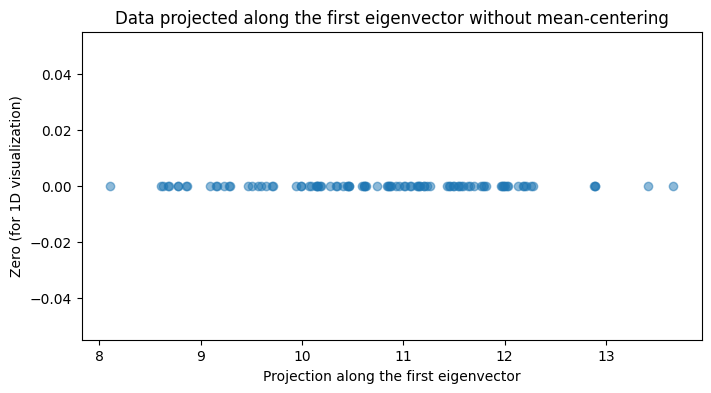

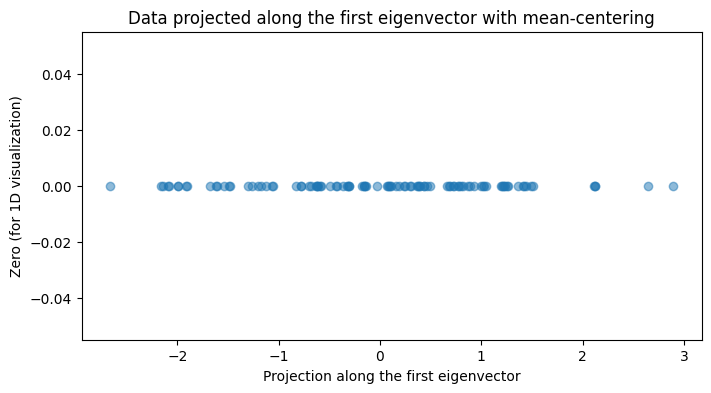

In [32]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# Ensure you have PyTorch installed in your environment to run this code.

def pca_and_plot_torch(X, mean_center=False):
    """
    Performs PCA on the given dataset X using PyTorch and plots the data along the first eigenvector.

    Parameters:
    - X: A numpy array of shape (n_samples, n_features).
    - mean_center: A boolean indicating whether to mean-center the data before PCA.
    """
    # Convert numpy array to a PyTorch tensor
    X_tensor = torch.tensor(X, dtype=torch.float32)

    # Mean-center the data if requested
    if mean_center:
        X_mean = torch.mean(X_tensor, dim=0)
        X_centered = X_tensor - X_mean
    else:
        X_centered = X_tensor

    # Compute the covariance matrix of the centered data
    cov_matrix_X = torch.cov(X_centered.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix_X)

    # Sort the eigenvalues (and corresponding eigenvectors) in descending order
    sorted_indices = torch.argsort(eigenvalues, descending=True)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Keep only the first eigenvector
    first_eigenvector = eigenvectors[:, 0:1]

    # Project the data onto the first eigenvector
    projected = torch.matmul(X_centered, first_eigenvector).squeeze().numpy()

    # Plot the projection
    plt.figure(figsize=(8, 4))
    plt.scatter(projected, np.zeros_like(projected), alpha=0.5)
    plt.xlabel('Projection along the first eigenvector')
    plt.ylabel('Zero (for 1D visualization)')
    plt.title(f"Data projected along the first eigenvector {'with' if mean_center else 'without'} mean-centering")
    plt.show()

# Example usage with your dataset X (assuming it's already loaded as a numpy array):
# Perform PCA and plot without mean-centering
pca_and_plot_torch(X, mean_center=False)

# Perform PCA and plot with mean-centering
pca_and_plot_torch(X, mean_center=True)


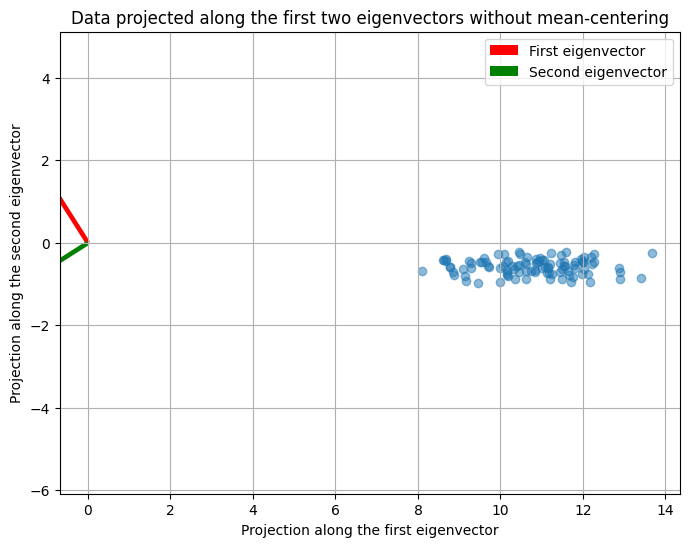

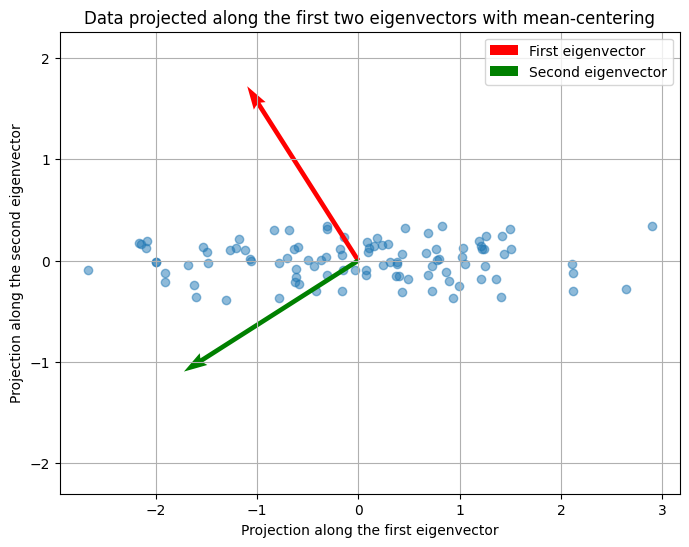

In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def pca_and_plot_torch_2d_with_eigenvectors(X, mean_center=False):
    """
    Performs PCA on the given dataset X using PyTorch, plots the data along the first two eigenvectors,
    and includes arrows for the eigenvectors to indicate their direction and magnitude.

    Parameters:
    - X: A numpy array of shape (n_samples, n_features).
    - mean_center: A boolean indicating whether to mean-center the data before PCA.
    """
    # Convert numpy array to a PyTorch tensor
    X_tensor = torch.tensor(X, dtype=torch.float32)

    # Mean-center the data if requested
    if mean_center:
        X_mean = torch.mean(X_tensor, dim=0)
        X_centered = X_tensor - X_mean
    else:
        X_centered = X_tensor

    # Compute the covariance matrix of the centered data
    cov_matrix_X = torch.cov(X_centered.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = torch.linalg.eigh(cov_matrix_X)

    # Sort the eigenvalues (and corresponding eigenvectors) in descending order
    sorted_indices = torch.argsort(eigenvalues, descending=True)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Keep only the first two eigenvectors
    first_two_eigenvectors = eigenvectors[:, :2]

    # Project the data onto the first two eigenvectors
    projected_2d = torch.matmul(X_centered, first_two_eigenvectors).numpy()

    # Plot the projection
    plt.figure(figsize=(8, 6))
    plt.scatter(projected_2d[:, 0], projected_2d[:, 1], alpha=0.5)

    # Include arrows for eigenvectors
    origin = [0, 0] # origin point
    plt.quiver(*origin, *first_two_eigenvectors[:, 0], color='r', scale=3, label='First eigenvector')
    plt.quiver(*origin, *first_two_eigenvectors[:, 1], color='g', scale=3, label='Second eigenvector')

    plt.xlabel('Projection along the first eigenvector')
    plt.ylabel('Projection along the second eigenvector')
    plt.title(f"Data projected along the first two eigenvectors {'with' if mean_center else 'without'} mean-centering")
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

# Example usage with your dataset X (assuming it's already loaded as a numpy array):
# Perform PCA and plot in 2D without mean-centering and with eigenvector arrows
pca_and_plot_torch_2d_with_eigenvectors(X, mean_center=False)

# Perform PCA and plot in 2D with mean-centering and with eigenvector arrows
pca_and_plot_torch_2d_with_eigenvectors(X, mean_center=True)
